###**Importamos las librerías**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#ignorar warning para que quede mejor el notebook
import warnings
warnings.filterwarnings('ignore')

###**Importamos el dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Este dataset se trata sobre un centro comercial (shopping) que otorga tarjetas de membresía y de ahí obtienen datos como son: ID del cliente, edad, género, ingreso anual y un puntaje sobre cuánto gastan en el shopping.

##**Análisis de variables**

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

####Encodeamos la columna categórica faltante en caso de que la usemos luego.

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
map_gender = { 'Male': 0,
               'Female': 1
}

df['Gender'] = df['Gender'].replace(map_gender)

###**KMEANS**

####Escalamos los datos

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [ ]:
df_scaled = pd.DataFrame(data = df_scaled, columns = df.columns)

####Seleccionamos variables para el modelo

In [ ]:
#Consideramos solo dos variables (Annual income and Spending Score) - no tenemos Label disponible
X= df_scaled.iloc[:, [3,4]].values

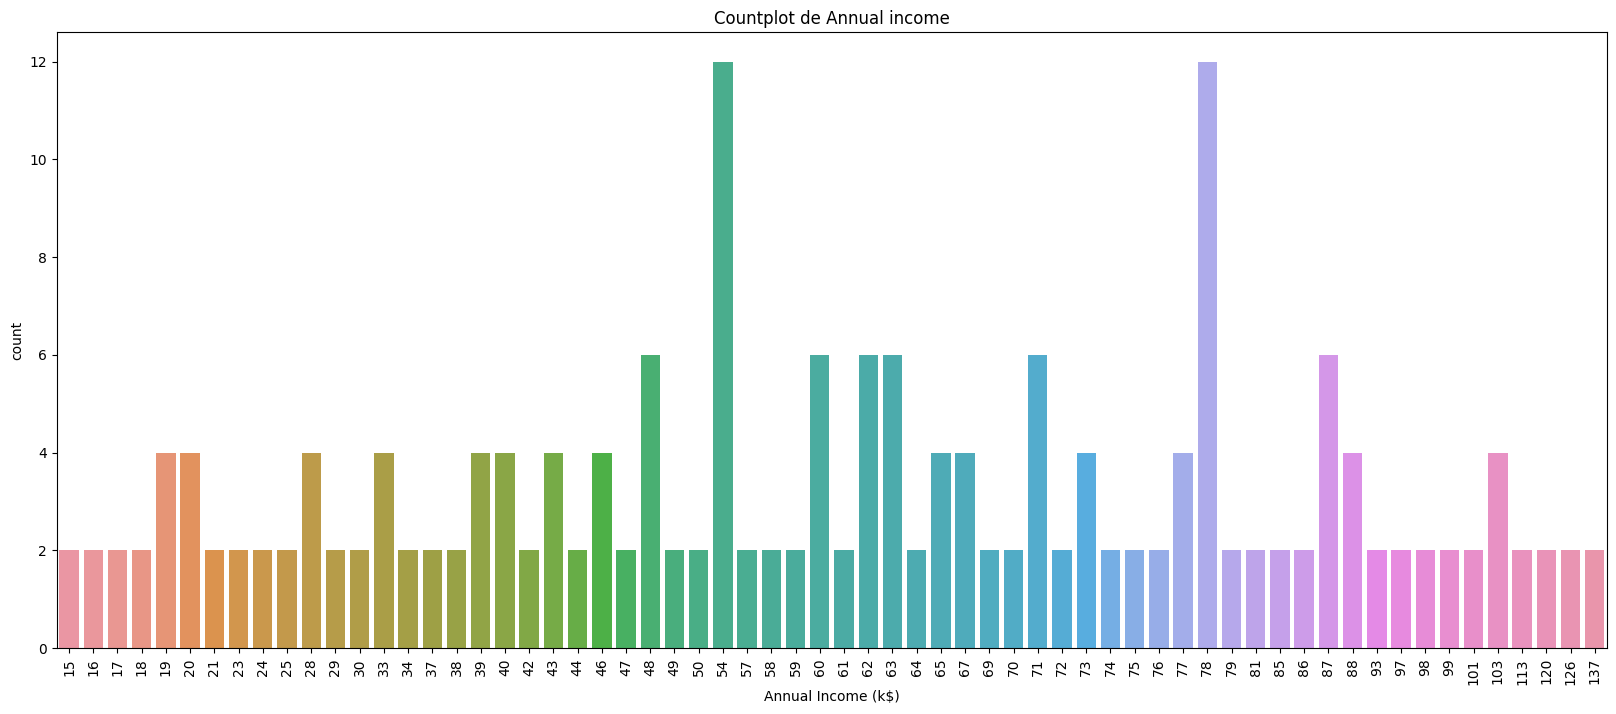

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x="Annual Income (k$)", data=df)
plt.title("Countplot de Annual income")
plt.xticks(rotation=90)
plt.show()

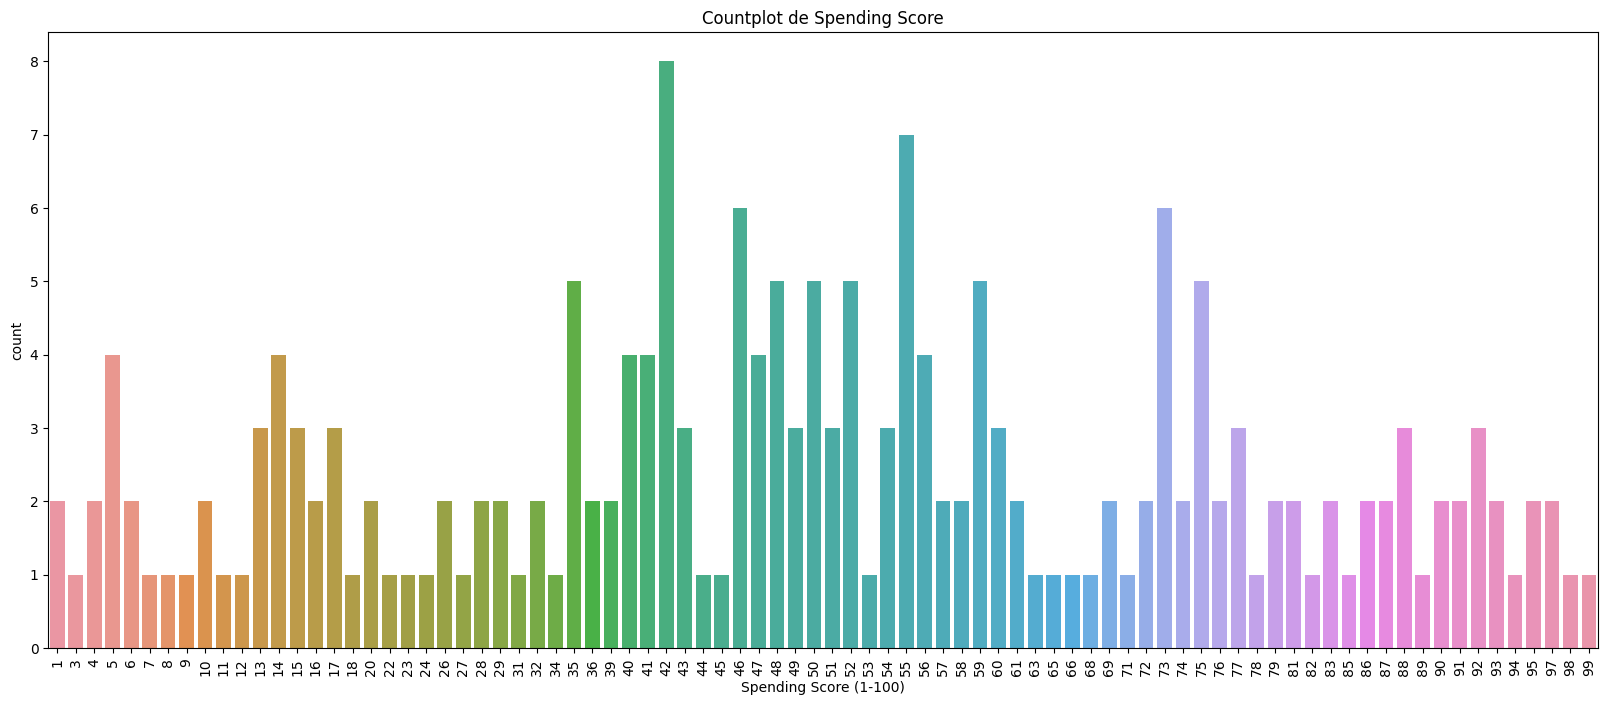

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x="Spending Score (1-100)", data=df)
plt.title("Countplot de Spending Score")
plt.xticks(rotation=90)
plt.show()

Utilizaremos "El método del codo" que la idea consiste en graficar la variación total explicada (inercia) por el modelo en función del número de clusters, y luego seleccionar el número de clusters donde la disminución en la variación comienza a disminuir bruscamente.

In [ ]:
K = np.arange(1, 11)
lista_inercias = []

for i in K:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)
  lista_inercias.append(kmeans.inertia_)

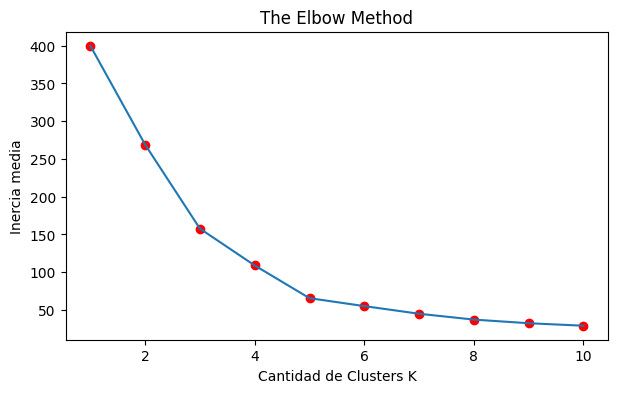

In [ ]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('The Elbow Method')
plt.show()

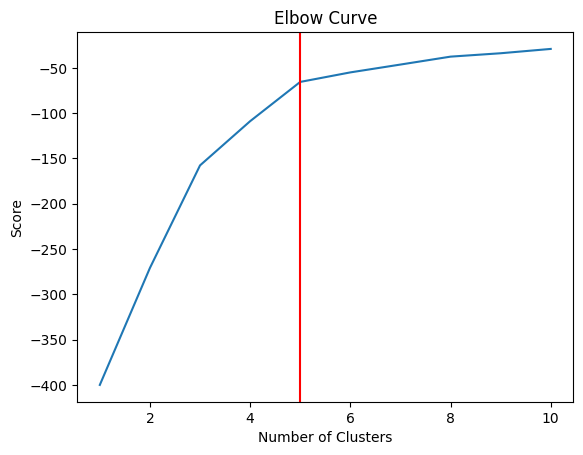

In [ ]:
Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.axvline(5,0,1,color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters= 5, random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [ ]:
etiquetas_kmeans = kmeansmodel.labels_
np.unique(etiquetas_kmeans)

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
centros = kmeansmodel.cluster_centers_
print(centros)

[[ 1.05500302 -1.28443907]
 [-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [-1.30751869 -1.13696536]]


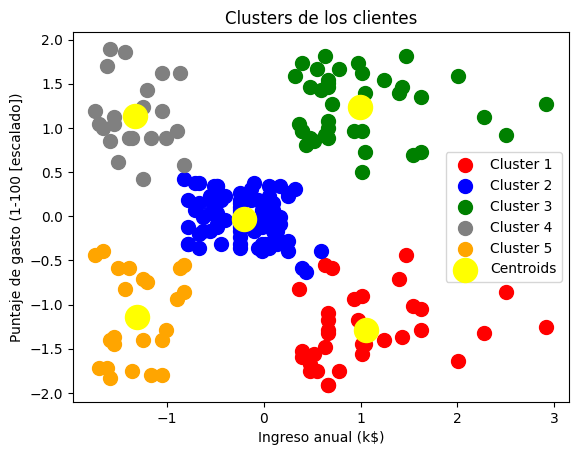

In [ ]:
#Visualizamos los clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'grey', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de los clientes')
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100 [escalado])')
plt.legend()
plt.show()

###***Interpretación del modelo con K-means***

- Cluster 1 (rojo) : ganan mucho pero son los que menos gastan

- Cluster 2 (azul) : gasto y sueldo promedio

- Cluster 3 (verde) : ganan y gastan mucho

- Cluster 4 (gris) : ganan menos pero gastan mucho

- Cluster 5 (naranja) : ganan poco y gastan poco

###Evaluación con Suma de los Cuadrados de las Distancias (SSD)

Esta métrica mide la distancia entre cada punto y su centroide asignado, y luego suma los cuadrados de estas distancias. La SSD es una medida de cómo de bien los centroides representan los puntos en el dataset, y se espera que disminuya a medida que se ajusta el modelo.

- Una SSD baja indica que los puntos dentro de un mismo cluster son muy similares entre sí, lo que sugiere que los clusters son coherentes y bien definidos.

- Una SSD alta indica que los puntos dentro de un mismo cluster son muy diferentes entre sí, lo que sugiere que los clusters podrían no ser coherentes o estar mal definidos.

En general, se busca minimizar la SSD al hacer clustering, ya que esto indica que los puntos dentro de un mismo cluster son muy similares entre sí, y por lo tanto, que los clusters son coherentes y bien definidos.

In [ ]:
# Calcula la SSD
SSD = kmeansmodel.inertia_
print("SSD: ", SSD)

SSD:  65.56840815571681


Este resultado nos sugiere que los clusters obtenidos por el algoritmo K-means son relativamente coherentes y bien definidos.

###Evaluación con Silhoutte

El coeficiente de Silhouette es una métrica que proporciona una medida de qué tan bien se han agrupado los puntos en sus respectivos clusters, y se interpreta de la siguiente manera:

- Si el coeficiente de Silhouette es cercano a 1, significa que los puntos están bien agrupados dentro de sus respectivos clusters y se encuentran separados de los puntos de otros clusters.

- Si el coeficiente de Silhouette es cercano a -1, significa que los puntos están mal agrupados, y que algunos de ellos podrían estar mejor asignados a otro cluster.

- Si el coeficiente de Silhouette es cercano a 0, significa que los puntos están cerca del límite entre dos clusters, y que no está claro a qué cluster deberían pertenecer.

En general, se considera que un coeficiente de Silhouette por encima de 0.5 indica una buena separación entre los clusters, mientras que valores por debajo de 0.2 indican que los clusters podrían no ser significativos.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coef = silhouette_score(X, etiquetas_kmeans)
print("Coeficiente de Silueta para KMeans: ", silhouette_coef)

Coeficiente de Silueta para KMeans:  0.5546571631111091


Vemos que nos da un coeficiente de 0.55, por lo que esto nos indicaría que tenemos una buena separación entre los clusters.

In [ ]:
K = np.arange(2,20)
lista_silueta = []
for i in K:
  kmeans_silueta = KMeans(n_clusters = i, random_state = 0)
  kmeans_silueta.fit(X)
  lista_silueta.append(silhouette_score(X, kmeans_silueta.labels_))

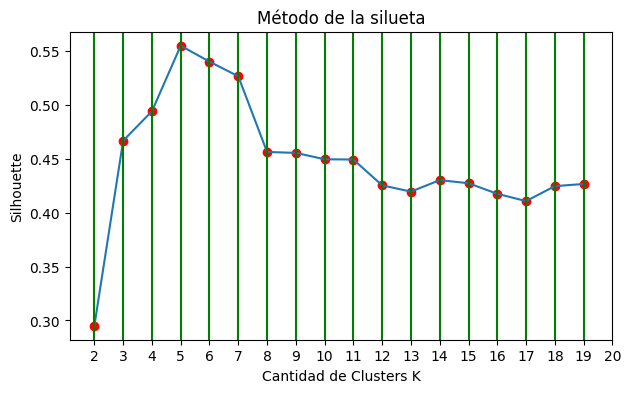

In [ ]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_silueta)
plt.scatter(K,lista_silueta,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette')
plt.title('Método de la silueta')
plt.xticks(np.arange(2,21))
for x in np.arange(2,20):
  plt.axvline(x,0,1,color='green')
plt.show()

##CONCLUSIONES

El análisis en este notebook nos permitió conocer información importante que se le puede brindar a la empresa dueña del shopping, debido a que nos presentó la distribución y agrupación de los clientes a los clusters compartiendo características que ayudarán a mejorar el servicio y realizar advertencias en caso de ser necesario.

Obtuvimos datos interesantes para tener en cuenta, por ejemplo, el grupo que no tiene grandes ingresos pero aún así tiene un alto puntaje en los gastos en el shopping. Se podría investigar más sobre qué productos compran (si son de canasta básica o artículos más de moda) y además se puede crear un sistema para advertirles sobre estos gastos.